C:\Users\zhang\AppData\Local\Temp\ipykernel_61292\1836960496.py:46: RuntimeWarning: overflow encountered in exp
  if np.random.rand() < np.exp(-beta * (new_energy - current_energy)):


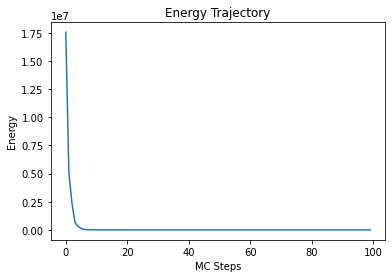

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_lattice(N, density, box_length):
    """
    初始化晶格，N为粒子数，density为粒子密度，box_length为模拟盒子的边长
    """
    positions = np.random.rand(N, 3) * box_length
    return positions

def lj_potential(r, epsilon, sigma):
    """
    计算Lennard-Jones势能
    """
    return 4 * epsilon * ((sigma / r) ** 12 - (sigma / r) ** 6)

def total_energy(positions, epsilon, sigma, box_length):
    """
    计算总势能
    """
    N = len(positions)
    total_energy = 0.0

    for i in range(N - 1):
        for j in range(i + 1, N):
            rij = positions[i] - positions[j]
            rij -= np.round(rij / box_length) * box_length
            distance = np.linalg.norm(rij)
            total_energy += lj_potential(distance, epsilon, sigma)

    return total_energy

def monte_carlo_step(positions, beta, epsilon, sigma, box_length):
    """
    执行一步蒙特卡洛模拟
    """
    N = len(positions)
    particle = np.random.randint(N)
    move = (np.random.rand(3) - 0.5) * 0.1  # 调整步长
    new_positions = np.copy(positions)
    new_positions[particle] += move

    current_energy = total_energy(positions, epsilon, sigma, box_length)
    new_energy = total_energy(new_positions, epsilon, sigma, box_length)

    if np.random.rand() < np.exp(-beta * (new_energy - current_energy)):
        positions[particle] += move

    return positions

def simulate(N, density, temperature, steps, epsilon, sigma, box_length):
    """
    执行蒙特卡洛模拟
    """
    positions = initialize_lattice(N, density, box_length)
    beta = 1.0 / temperature
    energies = []

    for step in range(steps):
        positions = monte_carlo_step(positions, beta, epsilon, sigma, box_length)
        if step % 100 == 0:
            energies.append(total_energy(positions, epsilon, sigma, box_length))

    return positions, energies

# 模拟参数
N = 50  # 粒子数
density = 0.8  # 初始密度
temperature = 1.0  # 温度
steps = 10000  # 模拟步数
epsilon = 1.0  # Lennard-Jones势能深度
sigma = 1.0  # Lennard-Jones硬核半径
box_length = (N / density) ** (1/3)  # 模拟盒子的边长

# 执行模拟
final_positions, energy_trajectory = simulate(N, density, temperature, steps, epsilon, sigma, box_length)

# 绘制能量轨迹
plt.plot(energy_trajectory)
plt.title('Energy Trajectory')
plt.xlabel('MC Steps')
plt.ylabel('Energy')
plt.show()
